In [119]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [120]:
def euler(f,x,y0):
    n = np.shape(x)[0]
    # checking the input data
    n = np.zeros(n)
    y[0] = y0
    h = x[1] - x[0]
    for i in range(n-1):
        y[i+1] = y[i] + h*f(x[i], y[i])
    return y

In [121]:
def euler_vector(f,x,y0):
    n = np.shape(x)[0]
    # checking the input data
    ns = np.shape(y0)[0]
    # setting up a two column matrix to store the ans
    y = np.zeros((n,ns))
    dx = x[1] - x[0]
    y[0,:] = y0
    for i in range(n-1):
        y[i+1,:] = y[i,:] + dx * f(x[i],y[i,:])
    return y

In [122]:
def problem(x, y):
    z1 = y[0]
    z2 = y[1]
    dz1 = z2
    dz2 = -z2 + z1
    dz = np.array([dz1, dz2])
    return dz 

In [123]:
y0 = np.array([0,1.354])
x = np.linspace(0,1,11)
print(y)
# first shooting
theta1 = 1.0
y = euler_vector(problem,x,[0.0, theta1])
y1 = y[-1,0]
yfirst = y[:,0]
# second shooting
theta2 = 2.0
y = euler_vector(problem,x,[0.0, theta2])
y2 = y[-1,0]
ysecond = y[:,0]
# third shooting
y3 = 1.0
theta3 = theta1 + (y3 -y1) / (y2-y1) * (theta2 - theta1)
y = euler_vector(problem,x,[0.0, theta3])
y3 =y[-1,0]
ythird = y[:,0]

[[0.         1.35489076]
 [0.13548908 1.21940168]
 [0.25742924 1.11101042]
 [0.36853029 1.0256523 ]
 [0.47109552 0.9599401 ]
 [0.56708953 0.91105564]
 [0.65819509 0.87665903]
 [0.74586099 0.85481264]
 [0.83134226 0.84391747]
 [0.915734   0.84265995]
 [1.         0.84996736]]


(0.0, 1.0)

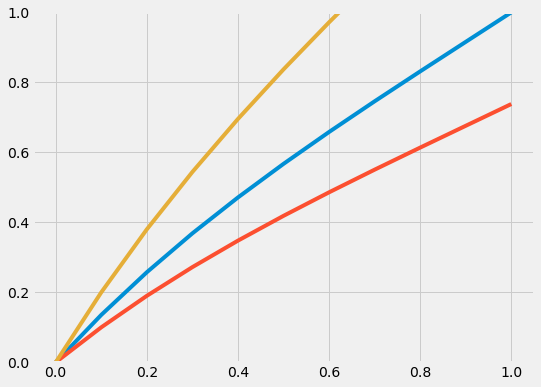

In [127]:
fig = plt.figure(1, figsize = (8,6)); plt.clf()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y[:,0])
ax.plot(x, yfirst, x, ysecond)
ax.set_ylim([0.0, 1.0])

In [125]:
A = np.zeros((3,3))
h = 0.25
A[0:,] = [-(4+2*h**2), 2+h, 0.0]
A[1:,] = [2-h, -(4+2*h**2), 2+h]
A[2:,] = [0.0, 2-h, -(4+2*h**2)]
b = np.array([0.0, 0.0, -(2+h)])
yFD = np.linalg.solve(A, b)
xFD = np.array([0.25, 0.50, 0.75])
print(y)

[[0.         1.35489076]
 [0.13548908 1.21940168]
 [0.25742924 1.11101042]
 [0.36853029 1.0256523 ]
 [0.47109552 0.9599401 ]
 [0.56708953 0.91105564]
 [0.65819509 0.87665903]
 [0.74586099 0.85481264]
 [0.83134226 0.84391747]
 [0.915734   0.84265995]
 [1.         0.84996736]]
